<a href="https://colab.research.google.com/github/RSample12/Data-Science/blob/main/Copy_of_329e_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 6

## Your Name Here (or your names here if you are pair programming)
Riley Sample
rcs3396

## Logistic Regression without using any libraries.

In [ ]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Your allowed to use only the above libraries that are imported. No other libs should be used in this assignment.

## Heart Dataset

In this Assignment we will work with some patients dataset.

We have access to 303 patients data. The features are listed below.

In [ ]:
# Your code here
heart_df = pd.read_csv("Heart.csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type

* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: resting electrocardiographic results

* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**RestECG:** The person’s maximum heart rate achieved

**MaxHR:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**Slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

* 0: downsloping;
* 1: flat;
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)

# Task - 1 (4 points)
We want to use logistic regerssion to perdict if the patients will have heart problems or not. The column "Target" in our datasets includes data about heart diseases. If the patient had heart disease we have a 1 and if not a zero.

Prepare your data set for predicting heart disease ("Target" column) out of 3 features:

* Age of the patient (Column **"Age"**)
* Gender of the patient (male or female - Column **"Sex"**)
* Cholestrol level of the patient (Column **"Chol"**)


Split your data into 80% traning data and 20% test data, and implement logistic regression model ***without*** using any libs than imported above. You must do it manually.

* Do maximum **100 iterations**
* Use a very small learning rate for checking your GD implementation.
* Your are allowed to use your choice of learning rate, like using 0.0001, 0.001 or 0.01 or 0.1 or higher/lower.
* Visualize your costs.
* No need to add an y-intercept in this task.


In [ ]:
# x and y
y = heart_df['Target']
y = y.replace(to_replace="No", value=1)
y = y.replace(to_replace="Yes", value=0)

x = heart_df[['Age', 'Sex', 'Chol']]

In [ ]:
# Add your code Here!
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [ ]:
def sigmoid(z):
    """
    To convert continuous value into a range of 0 to 1

    I/P
    ----------
    z : Continuous value

    O/P
    -------
    Value in range between 0 to 1.
    """
    g = 1 / (1 + np.exp(-z))
    return g

In [ ]:
def cost_function(X, y, weights):
    """
    Compute cost for logistic regression.

    I/P
    ----------
    X : 2D array where each row represent the training example and each column represent the feature ndarray.
        Dimension (n x d)
        n = number of training examples
        d = number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each traing example. dimension(1 x n)

    weights : 1D array of fitting parameters or weights. Dimension (1 x d)

    O/P
    -------
    cost : The cost of using theta as the parameter for linear regression to fit the data points in X and y.
    """
    n, d = X.shape
    x_dot_weights = X.dot(weights)

    cost = 1.0 / n * (-y.T.dot(np.log(sigmoid(x_dot_weights))) - (1 - y).T.dot(np.log(1 - sigmoid(x_dot_weights))))

    return cost

In [ ]:
def gradient(X, y, weights):
    """
    Compute gradient for logistic regression.

    I/P
    ----------
    X : 2D array where each row represent the training example and each column represent the feature ndarray.
    Dimension(m x n)
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each traing example. dimension(1 x m)

    weights : 1D array of fitting parameters or weights. Dimension (1 x n)

    O/P
    -------
    grad: (numpy array)The gradient of the cost with respect to the parameters theta
    """
    l = 1
    n, d = X.shape
    x_dot_weights = X.dot(weights)

    grad = (1.0 / n )* (sigmoid(x_dot_weights) - y).T.dot(X) + (l*weights)
    return grad

In [ ]:
weights = np.zeros(3)


cost = cost_function(X_train, y_train, weights)
grad = gradient(X_train, y_train, weights)

print(cost)
print(grad)

0.6931471805599453
Age    -1.090909
Sex     0.028926
Chol   -7.173554
dtype: float64


In [ ]:
weights = np.zeros(3)


# Now we optimize it using Gradient Descent.
num_iterations = 100
learnin_rate = 0.0001

cost_list = []


# Implementation here is removed.

# Your task to implement the GD here.

for i in range(0, num_iterations):

    #
    # Calculate the costs
    cost = cost_function(X_train, y_train, weights)

    print("Cost is: ", cost)
    # keep the costs for our visualization later

    cost_list.append(cost)

    # Calculate the gradients [CODE REMOVED]
    g = gradient(X_train, y_train, weights)

    # Use the gradient to update the weights [CODE REMOVED]
    weights = weights - (learnin_rate * g)

Cost is:  0.6931471805599453
Cost is:  0.6922320001357711
Cost is:  0.6918202996366462
Cost is:  0.6916380350269508
Cost is:  0.6915492909505204
Cost is:  0.6915016926807865
Cost is:  0.6914715747234784
Cost is:  0.6914490231918266
Cost is:  0.6914298300992135
Cost is:  0.6914121173415617
Cost is:  0.6913951427763126
Cost is:  0.6913785426153755
Cost is:  0.6913621910819465
Cost is:  0.6913460132682954
Cost is:  0.6913299898996448
Cost is:  0.6913141032830481
Cost is:  0.6912983510012679
Cost is:  0.6912827276272283
Cost is:  0.6912672327058621
Cost is:  0.6912518638224908
Cost is:  0.691236620406935
Cost is:  0.6912215009312439
Cost is:  0.6912065046088356
Cost is:  0.6911916302253566
Cost is:  0.6911768768788165
Cost is:  0.6911622434847787
Cost is:  0.6911477290954139
Cost is:  0.6911333326887596
Cost is:  0.6911190533056238
Cost is:  0.691104889959576
Cost is:  0.691090841695554
Cost is:  0.6910769075513586
Cost is:  0.6910630865826982
Cost is:  0.6910493778466893
Cost is:  0.69103

In [ ]:
weights

Age    -0.003271
Sex    -0.000456
Chol    0.001141
dtype: float64

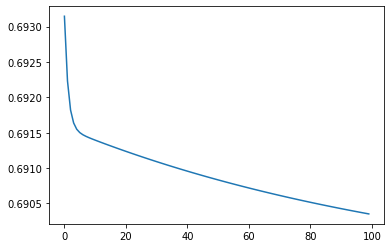

In [ ]:
plt.plot(np.arange(num_iterations), cost_list)
plt.show()

# Task 2 - (4 points)

Cacluate the accuracy, Precision, Recall and F1 score of your logistic regression implementaion.
Print the results.

You may use equations shown in lecture/slides/examples.

In [ ]:
def predict(weights, X):
    """
    Predict the class between 0 and 1 using learned logistic regression parameters weights.
    Using threshold value 0.5 to convert probability value to class value

    I/P
    ----------
    X : 2D array where each row represent the training example and each column represent the feature ndarray.
        Dimension(n x d)
        n= number of training examples
        d= number of features (including X_0 column of ones)

    theta : 1D array of fitting parameters or weights. Dimension (1 x n)

    O/P
    -------
    Class type based on threshold
    """
    p = sigmoid(X.dot(weights)) >= 0.5
    return p.astype(int)

In [ ]:
# Add your code Here!
from sklearn.metrics import classification_report
pred = predict(weights, X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.50      0.04      0.07        28
           1       0.54      0.97      0.70        33

    accuracy                           0.54        61
   macro avg       0.52      0.50      0.38        61
weighted avg       0.52      0.54      0.41        61



In [ ]:
# Correct Predictions are the cases that are equal.

correct = np.sum(pred == y_test)


print("Accuracy is: ", correct/y_test.size)

Accuracy is:  0.5409836065573771


# Task 3 - (4 points)


Add y-intercept and repeat the above 2 tasks. Do you see any differences after adding the y-intercept?


In [ ]:
X_train['bias'] = 1

In [ ]:
# Add your code Here!
w = np.zeros(4)

# Now we optimize it using Gradient Descent.
num_iterations = 100
learnin_rate = 0.0001

cost_list = []


# Implementation here is removed.

# Your task to implement the GD here.

for i in range(0, num_iterations):
    #
    # Calculate the costs

    cost = cost_function(X_train, y_train, w)

    print("Cost is: ", cost)
    # keep the costs for our visualization later

    cost_list.append(cost)

    # Calculate the gradients [CODE REMOVED]
    g = gradient(X_train, y_train, w)

    # Use the gradient to update the weights [CODE REMOVED]
    w = w - (learnin_rate * g)

Cost is:  0.6931471805599453
Cost is:  0.6922320176359008
Cost is:  0.691820284627936
Cost is:  0.6916379835212021
Cost is:  0.6915492072621414
Cost is:  0.6915015818855457
Cost is:  0.6914714400809029
Cost is:  0.6914488666155287
Cost is:  0.6914296525833715
Cost is:  0.6914119193498927
Cost is:  0.6913949245017256
Cost is:  0.6913783040977898
Cost is:  0.6913619322961084
Cost is:  0.6913457341490618
Cost is:  0.6913296903689833
Cost is:  0.6913137832528683
Cost is:  0.6912980103821107
Cost is:  0.6912823663272385
Cost is:  0.691266850633905
Cost is:  0.6912514608870984
Cost is:  0.691236196517551
Cost is:  0.6912210559975966
Cost is:  0.6912060385414737
Cost is:  0.6911911429353231
Cost is:  0.6911763682778886
Cost is:  0.6911617134853069
Cost is:  0.6911471776104284
Cost is:  0.6911327596318935
Cost is:  0.6911184585911591
Cost is:  0.6911042735024052
Cost is:  0.6910902034111996
Cost is:  0.6910762473559529
Cost is:  0.6910624043929896
Cost is:  0.691048673580032
Cost is:  0.691035

In [ ]:
b = w[-1]
w = w[:3]

In [ ]:
weights

Age    -0.003271
Sex    -0.000456
Chol    0.001141
dtype: float64

In [ ]:
def predict(weights, bias, X):
    """
    Predict the class between 0 and 1 using learned logistic regression parameters weights.
    Using threshold value 0.5 to convert probability value to class value

    I/P
    ----------
    X : 2D array where each row represent the training example and each column represent the feature ndarray.
        Dimension(n x d)
        n= number of training examples
        d= number of features (including X_0 column of ones)

    theta : 1D array of fitting parameters or weights. Dimension (1 x n)

    O/P
    -------
    Class type based on threshold
    """
    p = sigmoid(X.dot(weights) + bias) >= 0.5
    return p.astype(int)

In [ ]:
# Add your code Here!
pred = predict(weights, b, X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.50      0.04      0.07        28
           1       0.54      0.97      0.70        33

    accuracy                           0.54        61
   macro avg       0.52      0.50      0.38        61
weighted avg       0.52      0.54      0.41        61



In [ ]:
# Correct Predictions are the cases that are equal.

correct = np.sum(pred == y_test)


print("Accuracy is: ", correct/y_test.size)

Accuracy is:  0.5409836065573771


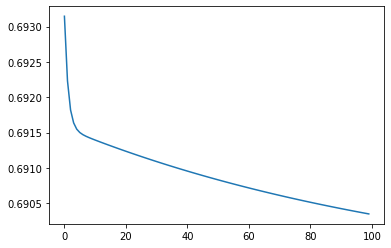

In [ ]:
plt.plot(np.arange(num_iterations), cost_list)
plt.show()

# Task 4 - Implement the Bold Driver   - (4 points)
In your GD implementation, add the bold driver idea to have a dynamic learning rate.

* Add a stop codition to stop the GD when the cost is not changing more than 0.001. (differences between two costs not more than 0.001, then stop)
* Can you stop earlier than 100 iterations?




In [ ]:
# Add your code Here!
X_train = X_train[['Age', 'Sex', 'Chol']]
weights = np.zeros(3)


# Now we optimize it using Gradient Descent.
num_iterations = 100
learnin_rate = 0.0001

cost_list = []


# Implementation here is removed.

# Your task to implement the GD here.
cost = cost_function(X_train, y_train, weights)
for i in range(0, num_iterations):

    #
    # Calculate the costs
    oldCost = cost
    print("Cost is: ", cost)

    # keep the costs for our visualization later

    cost_list.append(cost)

    # Calculate the gradients [CODE REMOVED]
    g = gradient(X_train, y_train, weights)

    # Use the gradient to update the weights [CODE REMOVED]
    weights = weights - (learnin_rate * g)

    cost = cost_function(X_train, y_train, weights)

    if abs(oldCost - cost) <= .001:
      break

Cost is:  0.6931471805599453


# Task 5 - Implement the L2 norm regularization.  - (4 points)

Modify your Cost and gradient to implement the l2 norm regularization.
Repreat the task 1 and 2 to check if your result is changing.

* Use y-itercept.
* Do max 100 iterations as before and report your accuracy, Precision, Recall and F1.
* You can stop earlier when the cost is not changing than 0.001.


**Optional:** you might want to use the bold driver. But you can do this task without the bold driver as well.



In [ ]:
# Add your code Here!
pred = predict(weights, b, X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.54      1.00      0.70        33

    accuracy                           0.54        61
   macro avg       0.27      0.50      0.35        61
weighted avg       0.29      0.54      0.38        61



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Correct Predictions are the cases that are equal.

correct = np.sum(pred == y_test)


print("Accuracy is: ", correct/y_test.size)

Accuracy is:  0.5409836065573771
